In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('../Data/final_dataset_v1.csv')

In [4]:
df.duplicated().sum()

122

In [5]:
df.head(1)
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features 

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,pareena mi casa,sector 68,0.92,7389.0,1245.0,Super Built up area 1245(115.66 sq.m.),2,2,3,Others,5.0,West,Under Construction,"['Sector 55-56 Metro Station', 'Airia Mall', 'Hong Kong Bazaar', 'Sohna Road', 'Delhi Jaipur Expressway', 'The Vivekananda School', 'Gurugram University', 'W Pratiksha Hospital', 'Indira Gandhi International Airport', 'V Club', 'Radisson Hotel Gurugram Sohna Road', 'Golden Greens Golf & Resorts', 'Fitso Sector 48 Spuddy, Badminton', 'SCC Drive-In Cinema', 'SkyJumper Trampoline Park']",NaN,"['Intercom Facility', 'Lift(s)', 'Feng Shui / Vaastu Compliant', 'Swimming Pool', 'Park', 'Piped-gas', 'Internet/wi-fi connectivity', 'Club house / Community Center', 'Fitness Centre / GYM', 'Rain Water Harvesting']"


## 1. areaWithType

In [6]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
3555,0.35,539.0,Carpet area: 547 (50.82 sq.m.)
392,2.25,1550.0,Super Built up area 1777(165.09 sq.m.)Built Up area: 1700 sq.ft. (157.94 sq.m.)Carpet area: 1550 sq.ft. (144 sq.m.)
2493,2.60,3150.0,Super Built up area 3150(292.64 sq.m.)
749,1.00,2693.0,Super Built up area 2020(187.66 sq.m.)
2434,0.60,1076.0,Super Built up area 1076(99.96 sq.m.)


In [7]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [8]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [9]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [10]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [11]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
561,4.45,flat,6500.0,Carpet area: 6500 (603.87 sq.m.),NaN,NaN,6500.0
497,0.66,flat,1310.0,Built Up area: 1310 (121.7 sq.m.),NaN,1310.0,NaN
2581,19.00,house,4500.0,Plot area 500(418.06 sq.m.),NaN,NaN,NaN
1500,0.84,flat,1245.0,Super Built up area 1245(115.66 sq.m.),1245.0,NaN,NaN
1757,0.96,flat,915.0,Super Built up area 915(85.01 sq.m.),915.0,NaN,NaN


In [12]:
df.duplicated().sum()

122

In [13]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [14]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
6,7.42,house,2160.0,Plot area 2160(200.67 sq.m.)Built Up area: 3200 sq.ft. (297.29 sq.m.),NaN,3200.0,NaN
9,0.92,house,603.0,Plot area 67(56.02 sq.m.),NaN,NaN,NaN
11,7.30,house,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800 sq.yards (4849.54 sq.m.)Carpet area: 5200 sq.yards (4347.86 sq.m.),NaN,5800.0,5200.0
17,3.40,house,2250.0,Plot area 250(209.03 sq.m.),NaN,NaN,NaN
24,3.25,house,1512.0,Plot area 168(140.47 sq.m.),NaN,NaN,NaN


In [15]:
df.isnull().sum()

property_type             0
society                 487
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [16]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [17]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
9,0.92,house,603.0,Plot area 67(56.02 sq.m.),NaN,NaN,NaN
17,3.40,house,2250.0,Plot area 250(209.03 sq.m.),NaN,NaN,NaN
24,3.25,house,1512.0,Plot area 168(140.47 sq.m.),NaN,NaN,NaN
40,2.10,house,900.0,Plot area 100(83.61 sq.m.),NaN,NaN,NaN
49,0.95,house,450.0,Plot area 450(41.81 sq.m.),NaN,NaN,NaN


In [18]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [19]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [20]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [21]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
9,0.92,house,603.0,Plot area 67(56.02 sq.m.),NaN,67.00,NaN
17,3.40,house,2250.0,Plot area 250(209.03 sq.m.),NaN,250.00,NaN
24,3.25,house,1512.0,Plot area 168(140.47 sq.m.),NaN,168.00,NaN
40,2.10,house,900.0,Plot area 100(83.61 sq.m.),NaN,100.00,NaN
49,0.95,house,450.0,Plot area 450(41.81 sq.m.),NaN,450.00,NaN
53,NaN,house,NaN,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
73,5.25,house,2610.0,Plot area 290(242.48 sq.m.),NaN,290.00,NaN
74,8.75,house,3600.0,Plot area 400(334.45 sq.m.),NaN,400.00,NaN
75,4.60,house,2610.0,Plot area 290(242.48 sq.m.),NaN,290.00,NaN
83,0.07,house,277.0,Plot area 33(27.59 sq.m.),NaN,33.00,NaN


In [22]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [23]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [24]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
9,0.92,house,603.0,Plot area 67(56.02 sq.m.),NaN,603.00,NaN
17,3.40,house,2250.0,Plot area 250(209.03 sq.m.),NaN,2250.00,NaN
24,3.25,house,1512.0,Plot area 168(140.47 sq.m.),NaN,1512.00,NaN
40,2.10,house,900.0,Plot area 100(83.61 sq.m.),NaN,900.00,NaN
49,0.95,house,450.0,Plot area 450(41.81 sq.m.),NaN,450.00,NaN
53,NaN,house,NaN,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
73,5.25,house,2610.0,Plot area 290(242.48 sq.m.),NaN,2610.00,NaN
74,8.75,house,3600.0,Plot area 400(334.45 sq.m.),NaN,3600.00,NaN
75,4.60,house,2610.0,Plot area 290(242.48 sq.m.),NaN,2610.00,NaN
83,0.07,house,277.0,Plot area 33(27.59 sq.m.),NaN,33.00,NaN


In [25]:
# update the original dataframe
df.update(all_nan_df)

In [26]:
df.isnull().sum()

property_type             0
society                 487
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [27]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,pareena mi casa,sector 68,0.92,7389.0,1245.0,Super Built up area 1245(115.66 sq.m.),2,2,3,Others,5.0,West,Under Construction,"['Sector 55-56 Metro Station', 'Airia Mall', 'Hong Kong Bazaar', 'Sohna Road', 'Delhi Jaipur Expressway', 'The Vivekananda School', 'Gurugram University', 'W Pratiksha Hospital', 'Indira Gandhi International Airport', 'V Club', 'Radisson Hotel Gurugram Sohna Road', 'Golden Greens Golf & Resorts', 'Fitso Sector 48 Spuddy, Badminton', 'SCC Drive-In Cinema', 'SkyJumper Trampoline Park']",NaN,"['Intercom Facility', 'Lift(s)', 'Feng Shui / Vaastu Compliant', 'Swimming Pool', 'Park', 'Piped-gas', 'Internet/wi-fi connectivity', 'Club house / Community Center', 'Fitness Centre / GYM', 'Rain Water Harvesting']",1245.0,NaN,NaN
1,flat,tata primanti,sector 72,4.00,16032.0,2495.0,Super Built up area 2905(269.88 sq.m.)Carpet area: 2495 sq.ft. (231.79 sq.m.),4,5,3+,Servant Room,22.0,West,1 to 5 Year Old,"['Sector 55-56 Metro Station', 'Omaxe City Centre', 'Sohna Gurgaon Road', 'Faridabad Gurgaon Road', 'Pallavan PreSchool, Sohna Road', 'RBSM Public school', 'Polaris Hospital', 'Spaze Itech Park', 'Radisson Hotel Gurugram Sohna Road', 'SkyJumper Trampoline Park Gurgaon']","['1 Water Purifier', '1 Exhaust Fan', '6 Geyser', '1 Stove', '6 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fan', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Wardrobe', 'No Washing Machine']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",2905.0,NaN,2495.0
2,flat,m3m capital,sector 113,2.00,12012.0,1665.0,Super Built up area 1665(154.68 sq.m.),3,3,2,not available,24.0,NaN,By 2023,"['Phase 2 Metro Station', 'Global Foyer Mall', 'Dwarka Expy', 'Shivani public school', 'Baghera University', 'Kutumbh Hospital', 'IGI Airport', 'Bijwasan Railway Station']",[],"['Lift(s)', 'Swimming Pool', 'Park', 'Visitor Parking', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1665.0,NaN,NaN
3,flat,sare crescent parc,sector 92,0.87,4971.0,1750.0,Super Built up area 1750(162.58 sq.m.),4,4,2,Store Room,2.0,East,5 to 10 Year Old,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. Sarkar Clinic', 'Sagar Clinic', 'Vijay Petrol Pump', 'HP Petrol Pump', 'Essar Petrol Pump', 'Indian Oil']","['1 Water Purifier', '7 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dining Table', '2 Geyser', '1 Stove', '6 Light', '2 AC', '1 Modular Kitchen', '1 Chimney', '4 Wardrobe', '1 Washing Machine', '1 Microwave', 'No Bed', 'No Curtains', 'No Sofa', 'No TV']","['Security / Fire Alarm', 'Lift(s)', 'Water purifier', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",1750.0,NaN,NaN
4,flat,la vida by tata housing,sector 113,2.78,10334.0,2690.0,Super Built up area 2690(249.91 sq.m.)Built Up area: 2350 sq.ft. (218.32 sq.m.)Carpet area: 2170 sq.ft. (201.6 sq.m.),3,4,3+,

## 2.additionalRoom

In [28]:
df['additionalRoom'].value_counts()

not available                                    1587
Servant Room                                      705
Study Room                                        250
Others                                            225
Pooja Room                                        165
Store Room                                         99
Study Room,Servant Room                            99
Pooja Room,Servant Room                            82
Pooja Room,Study Room,Servant Room,Store Room      72
Servant Room,Others                                60
Pooja Room,Study Room,Servant Room                 55
Pooja Room,Study Room,Servant Room,Others          54
Servant Room,Pooja Room                            38
Servant Room,Store Room                            33
Study Room,Others                                  29
Pooja Room,Study Room                              22
Pooja Room,Others                                  17
Pooja Room,Store Room                              15
Pooja Room,Store Room,Study 

In [29]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [30]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
1489,"Servant Room,Pooja Room",0,0,0,0,0
2076,"Servant Room,Study Room",0,0,0,0,0
2563,"Pooja Room,Servant Room,Study Room,Store Room",0,0,0,0,0
2975,Others,0,0,0,0,0
1228,Others,0,0,0,0,0


In [31]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,pareena mi casa,sector 68,0.92,7389.0,1245.0,Super Built up area 1245(115.66 sq.m.),2,2,3,Others,5.0,West,Under Construction,"['Sector 55-56 Metro Station', 'Airia Mall', 'Hong Kong Bazaar', 'Sohna Road', 'Delhi Jaipur Expressway', 'The Vivekananda School', 'Gurugram University', 'W Pratiksha Hospital', 'Indira Gandhi International Airport', 'V Club', 'Radisson Hotel Gurugram Sohna Road', 'Golden Greens Golf & Resorts', 'Fitso Sector 48 Spuddy, Badminton', 'SCC Drive-In Cinema', 'SkyJumper Trampoline Park']",NaN,"['Intercom Facility', 'Lift(s)', 'Feng Shui / Vaastu Compliant', 'Swimming Pool', 'Park', 'Piped-gas', 'Internet/wi-fi connectivity', 'Club house / Community Center', 'Fitness Centre / GYM', 'Rain Water Harvesting']",1245.0,NaN,NaN,0,0,0,0,0
1,flat,tata primanti,sector 72,4.00,16032.0,2495.0,Super Built up area 2905(269.88 sq.m.)Carpet area: 2495 sq.ft. (231.79 sq.m.),4,5,3+,Servant Room,22.0,West,1 to 5 Year Old,"['Sector 55-56 Metro Station', 'Omaxe City Centre', 'Sohna Gurgaon Road', 'Faridabad Gurgaon Road', 'Pallavan PreSchool, Sohna Road', 'RBSM Public school', 'Polaris Hospital', 'Spaze Itech Park', 'Radisson Hotel Gurugram Sohna Road', 'SkyJumper Trampoline Park Gurgaon']","['1 Water Purifier', '1 Exhaust Fan', '6 Geyser', '1 Stove', '6 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fan', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Wardrobe', 'No Washing Machine']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",2905.0,NaN,2495.0,0,0,0,0,0
2,flat,m3m capital,sector 113,2.00,12012.0,1665.0,Super Built up area 1665(154.68 sq.m.),3,3,2,not available,24.0,NaN,By 2023,"['Phase 2 Metro Station', 'Global Foyer Mall', 'Dwarka Expy', 'Shivani public school', 'Baghera University', 'Kutumbh Hospital', 'IGI Airport', 'Bijwasan Railway Station']",[],"['Lift(s)', 'Swimming Pool', 'Park', 'Visitor Parking', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1665.0,NaN,NaN,0,0,0,0,0
3,flat,sare crescent parc,sector 92,0.87,4971.0,1750.0,Super Built up area 1750(162.58 sq.m.),4,4,2,Store Room,2.0,East,5 to 10 Year Old,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. Sarkar Clinic', 'Sagar Clinic', 'Vijay Petrol Pump', 'HP Petrol Pump', 'Essar Petrol Pump', 'Indian Oil']","['1 Water Purifier', '7 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dining Table', '2 Geyser', '1 Stove', '6 Light', '2 AC', '1 Modular Kitchen', '1 Chimney', '4 Wardrobe', '1 Washing Machine', '1 Microwave', 'No Bed', 'No Curtains', 'No Sofa', 'No TV']","['Security / Fire Alarm', 'Lift(s)', 'Water purifier', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",1750.0,NaN,NaN,0,0,0,0,0
4,flat,la vida by tata housing,sector 113,2.78,10334.0,2690.0,Super Built up area 2690(249.91 

## 3.agePossession

In [32]:
df['agePossession'].value_counts()

1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Oct 2024                 8
Jan 2024                 8
Aug 2023                 7
Jun 2024                 7
Dec 2025                 7
Nov 2023                 5
By 2025                  4
Aug 2024                 4
Jul 2024                 4
Oct 2023                 4
Sep 2023                 4
Feb 2024                 3
Jan 2025                 3
May 2024                 3
Nov 2024                 3
Jan 2026                 2
Jun 2027                 2
Aug 2025                 2
Jul 2027                 2
Sep 2025                 2
Dec 2026                 2
Jul 2025                 2
Oct 2025                 2
By 2027                  2
A

In [33]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [34]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [35]:
df['agePossession'].value_counts()

Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: agePossession, dtype: int64

In [36]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,pareena mi casa,sector 68,0.92,7389.0,1245.0,Super Built up area 1245(115.66 sq.m.),2,2,3,Others,5.0,West,Under Construction,"['Sector 55-56 Metro Station', 'Airia Mall', 'Hong Kong Bazaar', 'Sohna Road', 'Delhi Jaipur Expressway', 'The Vivekananda School', 'Gurugram University', 'W Pratiksha Hospital', 'Indira Gandhi International Airport', 'V Club', 'Radisson Hotel Gurugram Sohna Road', 'Golden Greens Golf & Resorts', 'Fitso Sector 48 Spuddy, Badminton', 'SCC Drive-In Cinema', 'SkyJumper Trampoline Park']",NaN,"['Intercom Facility', 'Lift(s)', 'Feng Shui / Vaastu Compliant', 'Swimming Pool', 'Park', 'Piped-gas', 'Internet/wi-fi connectivity', 'Club house / Community Center', 'Fitness Centre / GYM', 'Rain Water Harvesting']",1245.0,NaN,NaN,0,0,0,0,0
1,flat,tata primanti,sector 72,4.00,16032.0,2495.0,Super Built up area 2905(269.88 sq.m.)Carpet area: 2495 sq.ft. (231.79 sq.m.),4,5,3+,Servant Room,22.0,West,Relatively New,"['Sector 55-56 Metro Station', 'Omaxe City Centre', 'Sohna Gurgaon Road', 'Faridabad Gurgaon Road', 'Pallavan PreSchool, Sohna Road', 'RBSM Public school', 'Polaris Hospital', 'Spaze Itech Park', 'Radisson Hotel Gurugram Sohna Road', 'SkyJumper Trampoline Park Gurgaon']","['1 Water Purifier', '1 Exhaust Fan', '6 Geyser', '1 Stove', '6 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fan', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Wardrobe', 'No Washing Machine']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",2905.0,NaN,2495.0,0,0,0,0,0
2,flat,m3m capital,sector 113,2.00,12012.0,1665.0,Super Built up area 1665(154.68 sq.m.),3,3,2,not available,24.0,NaN,Under Construction,"['Phase 2 Metro Station', 'Global Foyer Mall', 'Dwarka Expy', 'Shivani public school', 'Baghera University', 'Kutumbh Hospital', 'IGI Airport', 'Bijwasan Railway Station']",[],"['Lift(s)', 'Swimming Pool', 'Park', 'Visitor Parking', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1665.0,NaN,NaN,0,0,0,0,0
3,flat,sare crescent parc,sector 92,0.87,4971.0,1750.0,Super Built up area 1750(162.58 sq.m.),4,4,2,Store Room,2.0,East,Moderately Old,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. Sarkar Clinic', 'Sagar Clinic', 'Vijay Petrol Pump', 'HP Petrol Pump', 'Essar Petrol Pump', 'Indian Oil']","['1 Water Purifier', '7 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dining Table', '2 Geyser', '1 Stove', '6 Light', '2 AC', '1 Modular Kitchen', '1 Chimney', '4 Wardrobe', '1 Washing Machine', '1 Microwave', 'No Bed', 'No Curtains', 'No Sofa', 'No TV']","['Security / Fire Alarm', 'Lift(s)', 'Water purifier', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",1750.0,NaN,NaN,0,0,0,0,0
4,flat,la vida by tata housing,sector 113,2.78,10334.0,2690.0,Super Built up area 2690

## 4.furnishDetails

In [37]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
1468,NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
1644,NaN,"['Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Shopping Centre', 'Rain Water Harvesting']"
338,NaN,NaN
1053,"['2 Wardrobe', '4 Fan', '1 Exhaust Fan', '2 Geyser', '5 Light', '4 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'No open drainage around', 'Recently Renovated', 'Piped-gas', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
2767,"['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '3 Geyser', '12 Light', '6 AC', '1 Modular Kitchen', '1 Chimney', '1 Curtains', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"


In [38]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]


In [39]:
furnishings_df.shape

(3803, 20)

In [40]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

/home/roronoa/.conda/envs/tf/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [41]:
furnishings_df.sample(5)

,Wardrobe,Curtains,Dining Table,Exhaust Fan,Bed,Water Purifier,AC,Fan,Stove,TV,Club house,Sofa,Washing Machine,Geyser,Light,Microwave,Chimney,Modular Kitchen,Fridge
764,0,1,0,1,0,0,4,3,0,0,0,0,0,2,0,0,0,0,0
1095,2,0,0,0,0,0,0,2,0,0,0,0,0,2,6,0,1,0,0
505,5,1,0,1,0,0,7,11,1,0,0,0,0,5,6,0,1,1,0
1156,2,0,0,0,0,0,4,4,0,0,0,0,0,3,5,0,1,0,0
2782,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [44]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

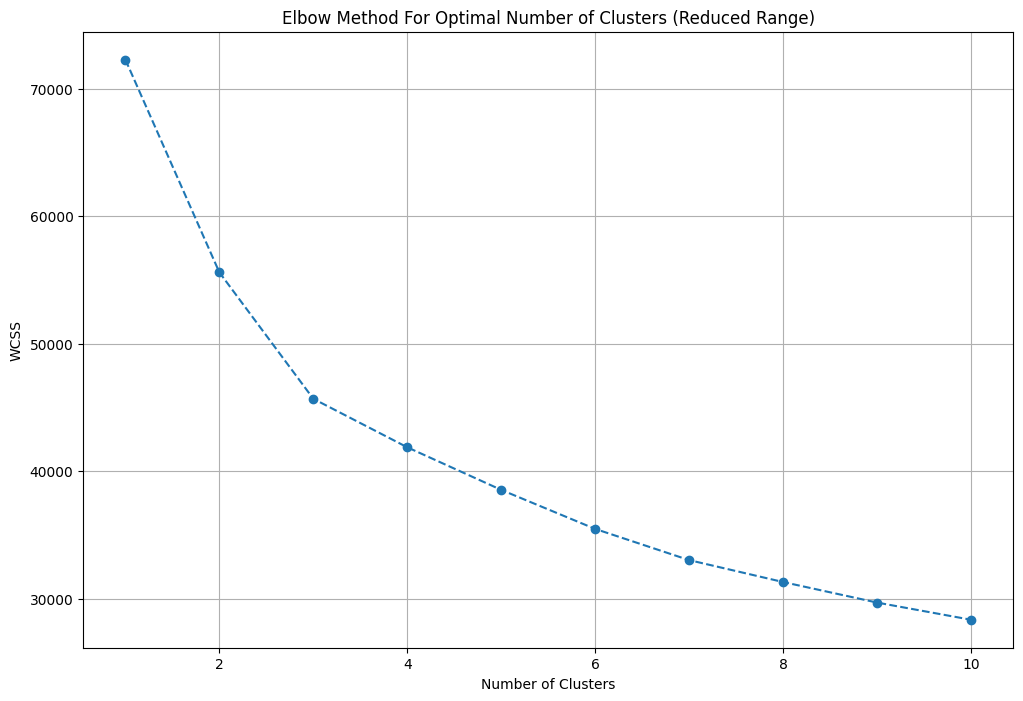

In [45]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [46]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [47]:
df = df.iloc[:,:-18]

In [48]:
df['furnishing_type'] = cluster_assignments

In [49]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
875,[],0
2325,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0
172,NaN,0
1244,[],0
1153,"['3 Wardrobe', '1 Water Purifier', '4 Fan', '1 Exhaust Fan', '3 Geyser', '5 Light', '1 Modular Kitchen', '1 Chimney', '1 Curtains', 'No AC', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']",2


## 5.features

In [50]:
df[['society','features']].sample(5)

,society,features
2601,signature global city,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
1809,NaN,"['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'False Ceiling Lighting', 'Separate entry for servant room', 'Park', 'Low Density Society', 'Club house / Community Center']"
1322,corona optus,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
1422,shapoorji pallonji joyville gurugram,"['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Piped-gas', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']"
2265,birla navya,"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Visitor Parking', 'Swimming Pool', 'Park', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']"


In [51]:
df['features'].isnull().sum()

635

In [52]:
import pandas as pd
app_df = pd.read_csv('../Data/appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [53]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [54]:
temp_df = df[df['features'].isnull()]

In [55]:
temp_df.shape

(635, 27)

In [56]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [57]:
df.loc[temp_df.index,'features'] = x.values

In [58]:
df['features'].isnull().sum()

481

In [59]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [60]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [61]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
1328,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
3397,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
521,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
2393,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0


In [62]:
features_binary_df.shape

(3803, 130)

In [63]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

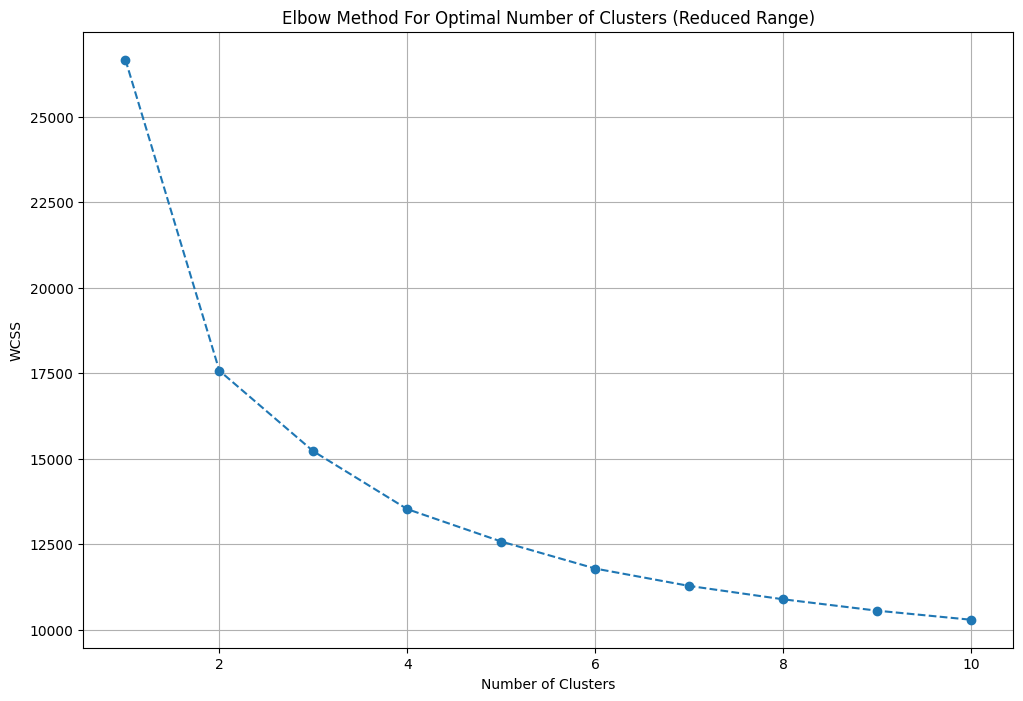

In [64]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [65]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [66]:
df['luxury_score'] = luxury_score

In [67]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,Wardrobe,furnishing_type,features_list,luxury_score
0,flat,pareena mi casa,sector 68,0.92,7389.0,1245.0,Super Built up area 1245(115.66 sq.m.),2,2,3,Others,5.0,West,Under Construction,"['Sector 55-56 Metro Station', 'Airia Mall', 'Hong Kong Bazaar', 'Sohna Road', 'Delhi Jaipur Expressway', 'The Vivekananda School', 'Gurugram University', 'W Pratiksha Hospital', 'Indira Gandhi International Airport', 'V Club', 'Radisson Hotel Gurugram Sohna Road', 'Golden Greens Golf & Resorts', 'Fitso Sector 48 Spuddy, Badminton', 'SCC Drive-In Cinema', 'SkyJumper Trampoline Park']",NaN,"['Intercom Facility', 'Lift(s)', 'Feng Shui / Vaastu Compliant', 'Swimming Pool', 'Park', 'Piped-gas', 'Internet/wi-fi connectivity', 'Club house / Community Center', 'Fitness Centre / GYM', 'Rain Water Harvesting']",1245.0,NaN,NaN,0,0,0,0,0,0,0,"[Intercom Facility, Lift(s), Feng Shui / Vaastu Compliant, Swimming Pool, Park, Piped-gas, Internet/wi-fi connectivity, Club house / Community Center, Fitness Centre / GYM, Rain Water Harvesting]",50
1,flat,tata primanti,sector 72,4.00,16032.0,2495.0,Super Built up area 2905(269.88 sq.m.)Carpet area: 2495 sq.ft. (231.79 sq.m.),4,5,3+,Servant Room,22.0,West,Relatively New,"['Sector 55-56 Metro Station', 'Omaxe City Centre', 'Sohna Gurgaon Road', 'Faridabad Gurgaon Road', 'Pallavan PreSchool, Sohna Road', 'RBSM Public school', 'Polaris Hospital', 'Spaze Itech Park', 'Radisson Hotel Gurugram Sohna Road', 'SkyJumper Trampoline Park Gurgaon']","['1 Water Purifier', '1 Exhaust Fan', '6 Geyser', '1 Stove', '6 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fan', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Wardrobe', 'No Washing Machine']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",2905.0,NaN,2495.0,0,0,0,0,0,0,2,"[Centrally Air Conditioned, Water purifier, Security / Fire Alarm, Feng Shui / Vaastu Compliant, Private Garden / Terrace, Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, False Ceiling Lighting, Water Storage, Separate entry for servant room, No open drainage around, Bank Attached Property, Piped-gas, Internet/wi-fi connectivity, Recently Renovated, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Airy Rooms, Spacious Interiors, Low Density Society, Waste Disposal, Rain Water Harvesting, Water softening plant, Shopping Centre, Fitness Centre / GYM, Club house / Community Center]",174
2,flat,m3m capital,sector 113,2.00,12012.0,1665.0,Super Built up area 1665(154.68 sq.m.),3,3,2,not available,24.0,NaN,Under Construction,"['Phase 2 Metro Station', 'Global Foyer Mall', 'Dwarka Expy', 'Shivani public school', 'Baghera University', 'Kutumbh Hospital', 'IGI Airport', 'Bijwasan Railway Station']",[],"['Lift(s)', 'Swimming Pool', 'Park', 'Visitor Parking', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1665.0,NaN,NaN,0,0,0,0,0,0,0,"[Lift(s), Swimming Pool, Park, Visitor Parking, Security Personnel, Shopping Centre, Fitness Centre / GYM, Club house / Community C

In [68]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [69]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,Wardrobe,furnishing_type,luxury_score
398,flat,microtek greenburg,sector 86,1.93,8446.0,2285.0,Super Built up area 2285(212.28 sq.m.),3,4,3,12.0,East,Relatively New,2285.0,NaN,NaN,0,0,0,0,0,0,0,72
1754,flat,ireo skyon,sector 60,3.75,13392.0,2800.0,Super Built up area 2800(260.13 sq.m.)Built Up area: 2650 sq.ft. (246.19 sq.m.)Carpet area: 2350 sq.ft. (218.32 sq.m.),4,4,3,12.0,North,Relatively New,2800.0,2650.0,2350.0,0,0,0,0,0,4,2,49
2418,flat,uphaar homes,sector 105,0.45,4736.0,950.0,Carpet area: 950 (88.26 sq.m.),3,2,1,1.0,NaN,Relatively New,NaN,NaN,950.0,0,0,0,0,0,0,2,44
786,flat,vatika india next,sector 82,0.80,6426.0,1245.0,Carpet area: 1245 (115.66 sq.m.),2,2,3,9.0,NaN,Undefined,NaN,NaN,1245.0,0,0,0,0,0,0,0,0
100,flat,bptp astaire gardens,sector 70a,1.80,9350.0,1925.0,Built Up area: 1925 (178.84 sq.m.),3,3,3,3.0,North-West,Relatively New,NaN,1925.0,NaN,0,0,0,0,0,0,0,135


In [70]:
df.shape

(3803, 24)

In [71]:
df = df.reset_index(drop=True)


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3803 non-null   object 
 1   society              3316 non-null   object 
 2   sector               3803 non-null   object 
 3   price                3785 non-null   float64
 4   price_per_sqft       3785 non-null   float64
 5   area                 3785 non-null   float64
 6   areaWithType         3803 non-null   object 
 7   bedRoom              3803 non-null   int64  
 8   bathroom             3803 non-null   int64  
 9   balcony              3803 non-null   object 
 10  floorNum             3784 non-null   float64
 11  facing               2698 non-null   object 
 12  agePossession        3803 non-null   object 
 13  super_built_up_area  1915 non-null   float64
 14  built_up_area        1733 non-null   float64
 15  carpet_area          1944 non-null   f

In [73]:
df.to_csv('../Data/final_dataset_v2.csv',index=False)